### Importing the Required Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [25]:
# Reading the data in CSV format
sales_data = pd.read_csv('superstore_final_dataset.csv', encoding='ISO-8859–1')


### Data Exploration

In [26]:
sales_data.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [27]:
# info about the dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [28]:
# The shape of the dataset
sales_data.shape

(9800, 18)

<Axes: title={'center': 'Missing values per columns, %'}>

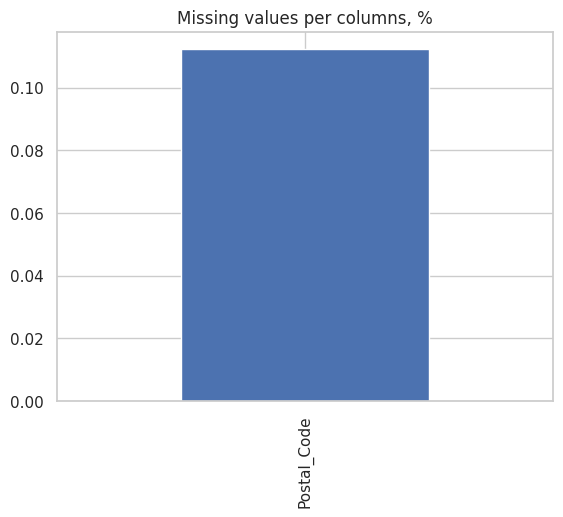

In [29]:
# finding if there are iany missing values in the dataset

missing_data = sales_data.isnull().mean() * 100

missing_data_columns = missing_data[missing_data > 0]

missing_data_columns.plot.bar(title='Missing values per columns, %')

### Data Cleaning

In [30]:
# finding null values in the data

sales_data.isnull().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

The results show that the dataset has null values in the postal code column. Although there are null values, it comes up to a sum of 11 and we can consider this insignificant. 

In [31]:
# Duplicate Data

sales_data.duplicated().sum()

0

There are no duplicated rows, so we can continue. 

### Calculated Field 

We need to create a calculated field called Profit Margin. The formula is (Profit / Sales) * 100. It produces a % answer. 

In [32]:
sales_data['Quantity'] = np.random.randint(1,6,sales_data.shape[0])


In [33]:
sales_data['Profit'] = np.random.randint(1000,size=9800)


In [34]:
sales_data['Profit Margin'] = (sales_data.Profit / sales_data.Sales) * 100
sales_data.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Profit,Profit Margin
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,5,42,16.032982
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,5,74,10.110118
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,3,164,1121.751026
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,1,603,62.971404
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,4,821,3670.422031


### Descriptive Statistics

In [35]:
# Getting the store's descriptive statistics

In [36]:
sales_data.describe(include='all')

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Profit,Profit Margin
count,9800.000000,9800,9800,9800,9800,9800,9800,9800,9800,9800,...,9789.000000,9800,9800,9800,9800,9800,9800.000000,9800.000000,9800.000000,9800.000000
unique,NaN,4922,1230,1326,4,793,793,3,1,529,...,NaN,4,1861,3,17,1849,NaN,NaN,NaN,NaN
top,NaN,CA-2018-100111,5/9/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,34,5859,35,35,5101,9800,891,...,NaN,3140,19,5909,1492,47,NaN,NaN,NaN,NaN
mean,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55273.322403,NaN,NaN,NaN,NaN,NaN,230.769059,3.018673,498.570000,2551.482331
std,2829.160653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32041.223413,NaN,NaN,NaN,NaN,NaN,626.651875,1.410947,288.884077,5617.572863
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,0.000000
25%,2450.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.248000,2.000000,249.000000,160.177648
50%,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58103.000000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,495.000000,690.547183
75%,7350.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,210.605000,4.000000,748.000000,2492.186596


## Data Analysis

Here we will answer the questions we posed at the beginning.

### Which Category is Best Selling and Most Profitable?

In [37]:
# Group sales, profit and quantity by category

category_analysis = pd.DataFrame(sales_data.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
category_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,728658.5757,1021258,6340
Office Supplies,705422.3340,2947808,17839
Technology,827455.8730,916920,5404


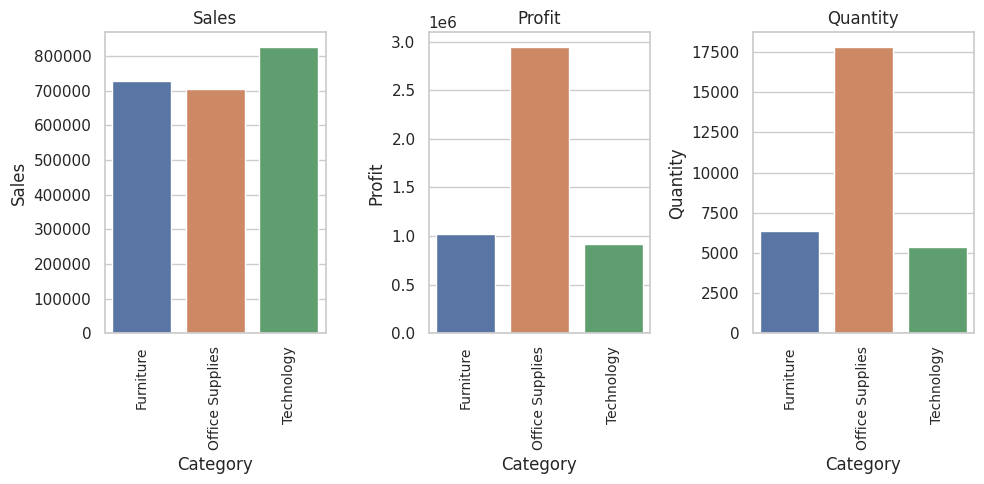

In [38]:
sns.set_theme(style='whitegrid')
figure, axis = plt.subplots(1, 3, figsize=(10, 5))

# Plotting the bars
plot1 = sns.barplot(x = category_analysis.index, y = category_analysis.Sales, ax=axis[0])
plot2 = sns.barplot(x = category_analysis.index, y = category_analysis.Profit, ax=axis[1])
plot3 = sns.barplot(x = category_analysis.index, y = category_analysis.Quantity, ax=axis[2])

# Titles

plot1.set(title = 'Sales')
plot2.set(title = 'Profit')
plot3.set(title = 'Quantity')

# Rotating the Axes

plt.setp(plot1.get_xticklabels(), rotation= 'vertical', size = 10)
plt.setp(plot2.get_xticklabels(), rotation= 'vertical', size = 10)
plt.setp(plot3.get_xticklabels(), rotation= 'vertical', size = 10)

#Spacing
figure.tight_layout()

- All 3 categories are similar in sales.
- Technology is the best-selling, but not the most profitable. 
- Although the sales of the 3 are similar, Office Supplies is by far the most profitable. 
- Office supplies are the ones that sold the most quantity too, and this might be an indicator as to why it was the most profitable category. 

### What are the Best Selling and Most Profitable Sub-Category?